In [1]:
import GCRCatalogs
import esutil
import numpy as np
import matplotlib.pyplot as plt

In [2]:
truthcat = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_image')

In [3]:
# print(sorted(truthcat.list_all_quantities()))
quantities_wanted = ['galaxy_id',
                     'ra', 'dec', 'redshift', 
                     'mag_true_g_lsst', 'mag_true_r_lsst', 'mag_true_i_lsst', 'mag_true_z_lsst', 'mag_true_y_lsst',
                     'Mag_true_g_lsst_z0', 'Mag_true_r_lsst_z0',
                     'halo_id', 'halo_mass', 'is_central',
                     'stellar_mass_bulge', 'stellar_mass_disk',
                     'blackHoleEddingtonRatio', 'blackHoleMass', 'blackHoleAccretionRate',
                     'totalStarFormationRate', 'diskStarFormationRate']

In [4]:
query = GCRCatalogs.GCRQuery('(mag_true_z_lsst < 24.0) & (is_central == True) & (halo_mass > 5e11)')
truthdata = truthcat.get_quantities(quantities_wanted, [query])

In [5]:
from astropy.table import Table
truthdata = Table(truthdata)

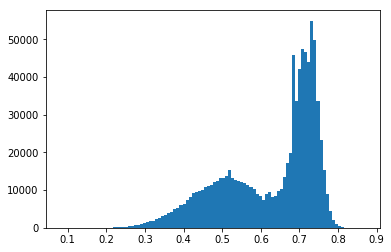

In [9]:
use, = np.where(truthdata['redshift'] < 0.5)
plt.hist(truthdata['Mag_true_g_lsst_z0'][use] - truthdata['Mag_true_r_lsst_z0'][use], bins=100)
red, = np.where((truthdata['Mag_true_g_lsst_z0'][use] - truthdata['Mag_true_r_lsst_z0'][use]) > 0.65)
blue, = np.where((truthdata['Mag_true_g_lsst_z0'][use] - truthdata['Mag_true_r_lsst_z0'][use]) < 0.65)

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'red centrals, z < 0.5')

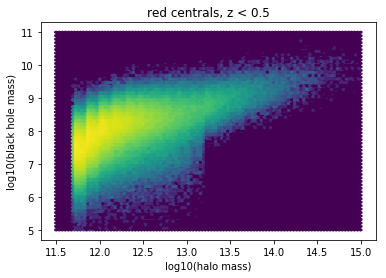

In [12]:
plt.hexbin(np.log10(truthdata['halo_mass'][use[red]]), np.log10(truthdata['blackHoleMass'][use[red]]), bins='log',
          extent=[11.5, 15.0, 5.0, 11.0])
plt.xlabel('log10(halo mass)')
plt.ylabel('log10(black hole mass)')
plt.title('red centrals, z < 0.5')

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'blue centrals, z < 0.5')

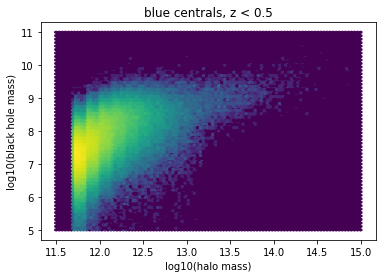

In [13]:
plt.hexbin(np.log10(truthdata['halo_mass'][use[blue]]), np.log10(truthdata['blackHoleMass'][use[blue]]), bins='log',
          extent=[11.5, 15.0, 5.0, 11.0])
plt.xlabel('log10(halo mass)')
plt.ylabel('log10(black hole mass)')
plt.title('blue centrals, z < 0.5')

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'red centrals, z < 0.5')

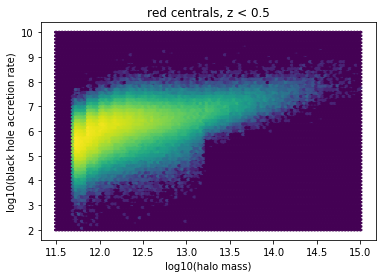

In [15]:
plt.hexbin(np.log10(truthdata['halo_mass'][use[red]]), np.log10(truthdata['blackHoleAccretionRate'][use[red]]), bins='log',
          extent=[11.5, 15.0, 2.0, 10.0])
plt.xlabel('log10(halo mass)')
plt.ylabel('log10(black hole accretion rate)')
plt.title('red centrals, z < 0.5')

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


Text(0.5, 1.0, 'blue centrals, z < 0.5')

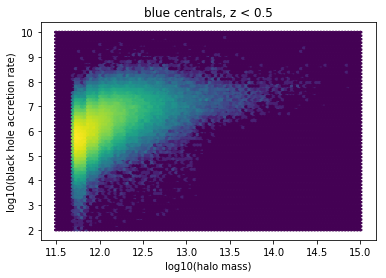

In [16]:
plt.hexbin(np.log10(truthdata['halo_mass'][use[blue]]), np.log10(truthdata['blackHoleAccretionRate'][use[blue]]), bins='log',
          extent=[11.5, 15.0, 2.0, 10.0])
plt.xlabel('log10(halo mass)')
plt.ylabel('log10(black hole accretion rate)')
plt.title('blue centrals, z < 0.5')

Text(0.5, 1.0, 'red centrals, z < 0.5')

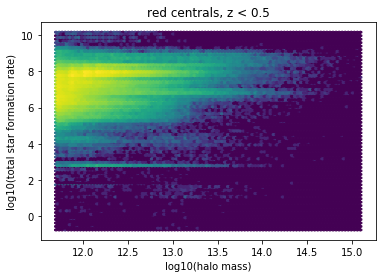

In [17]:
plt.hexbin(np.log10(truthdata['halo_mass'][use[red]]), np.log10(truthdata['totalStarFormationRate'][use[red]]), bins='log')
plt.xlabel('log10(halo mass)')
plt.ylabel('log10(total star formation rate)')
plt.title('red centrals, z < 0.5')

Text(0.5, 1.0, 'blue centrals, z < 0.5')

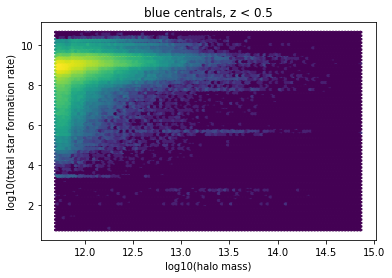

In [18]:
plt.hexbin(np.log10(truthdata['halo_mass'][use[blue]]), np.log10(truthdata['totalStarFormationRate'][use[blue]]), bins='log')
plt.xlabel('log10(halo mass)')
plt.ylabel('log10(total star formation rate)')
plt.title('blue centrals, z < 0.5')